In [2]:
import numpy as np
import matplotlib.pyplot as plt


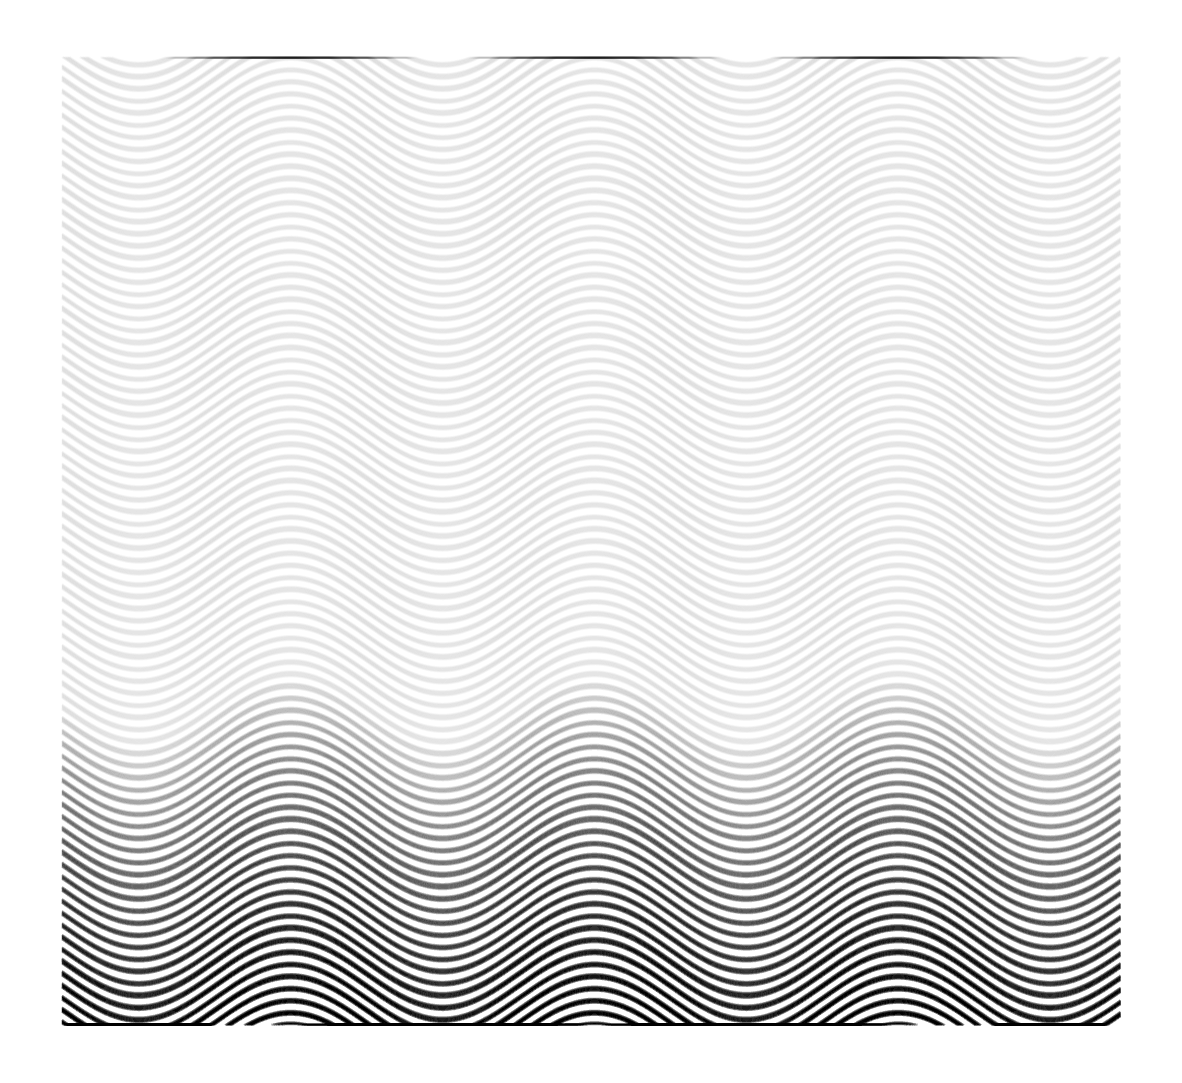

In [4]:
num_repeat = 40
num_sines = 100
max_repeat_line = 50

for sine_wave_shift in range(num_sines):
    for thick_shift in range(np.random.randint(10,13)):
        repeat_line = (sine_wave_shift - num_sines/2) / (num_sines/2) * max_repeat_line
        for _ in range(num_repeat):
            x = np.linspace(np.pi, 8*np.pi, 10000)
            y = np.sin(x)*.7 + thick_shift*0.01 + sine_wave_shift*0.25
            coords = np.column_stack((x, y))
            x_mask = (coords[:, 0] > 0) & (coords[:, 0] < 25)
            y_mask = (coords[:, 1] > 3) & (coords[:, 1] < 23)
            filtered = coords[x_mask & y_mask]
            plt.plot(filtered[:, 0], filtered[:, 1], 'k-', alpha=0.01)
    
    if num_repeat > 2:
        num_repeat -=1

plt.axis('off')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.show()

In [ ]:
num_repeat = 40
num_sines = 100
max_repeat_line = 50

lines = []
for sine_wave_shift in range(num_sines):
    repeat_line = np.abs((num_sines/2 - sine_wave_shift)) / (num_sines/2) * max_repeat_line
    lines.append(repeat_line)

print(lines)



[100.0, 99.0, 98.0, 97.0, 96.0, 95.0, 94.0, 93.0, 92.0, 91.0, 90.0, 89.0, 88.0, 87.0, 86.0, 85.0, 84.0, 83.0, 82.0, 81.0, 80.0, 79.0, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 70.0, 69.0, 68.0, 67.0, 66.0, 65.0, 64.0, 63.0, 62.0, 61.0, 60.0, 59.0, 57.99999999999999, 56.99999999999999, 56.00000000000001, 55.00000000000001, 54.0, 53.0, 52.0, 51.0, 50.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 28.999999999999996, 28.000000000000004, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.000000000000002, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.000000000000001, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
